# IS 597 - MLC Final Project 
## Identifying Crash Patterns for Injury Severity and Death Occurrences Using Fatality Analysis Reporting System (FARS) for 2022.
### Student Name:  Jayesh Yevale <br> Net ID:  jyeval2


The project is for Fatality Analysis Reporting System (FARS) for year 2022. The purpose is for the analyzing the crash pattern in car accidents using Fatality Analysis. The data is processed slightly before uploading to notebook, the further preprocessing is done in the function available in "modules.py". The modules.py acts as a pipeline for this notebook.

The requirement to run this notebook is:
- Input File (i.e. 'FARS2022_Person_Accident.xlsx')
- modules.py file

#### Importing the necessary functions from "modules.py" for further analysis

In [1]:
from modules import *

#### Defining the main function for the required analysis

In [2]:
def main_function(input_file, colname, model_method, eval_on):
    #load the functions
    X_train, X_test, y_train, y_test = load_data(input_file, colname)
    
    # Dictionary to store the fitted models
    results = {}

    for model_name in model_names:
        model = fit_model(X_train, y_train, model_name)
        y_pred = model.predict(X_test)
        evaluate_model(y_test, y_pred, eval_on)
        results[model_name] = {'model': model}
    return results

####  Setting the parameter values as per requirement

In [3]:
######################################################
##############  Set Parameter Values  ################
######################################################

    
###############  Input file name  ###############

input_filename = 'FARS2022_Person_Accident.xlsx'

    
#############  Select the target column  #############

target = 'A_PERINJ'        


#############  Which ML model to use?  #############
    
"""
Model options:
    
'DT': Decision Tree
'LR': Logisitic regression
'RF': Random Forest
'GB': Gradient Boosting
"""
model_names = ['LR', 'DT', 'RF', 'GB']                                            
        
        
#############  Would you like to conduct evaluation?  #############  
   
"""
indicate if you want to generate confusion matrix & classification report
     
0 for no
1 for yes 
"""
eval_on=1                                                 
                                         

#### Calling the main function by passing the parameters

************** Loading Data ************
No of Rows: 38941
No of Columns: 28
************** Data Info ************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38941 entries, 0 to 38940
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   A_PTYPE     38941 non-null  int64
 1   A_RESTUSE   38941 non-null  int64
 2   A_HELMUSE   38941 non-null  int64
 3   A_EJECT     38941 non-null  int64
 4   A_PERINJ    38941 non-null  int64
 5   A_DOA       38941 non-null  int64
 6   FATALS      38941 non-null  int64
 7   A_RU        38941 non-null  int64
 8   A_INTSEC    38941 non-null  int64
 9   A_JUNC      38941 non-null  int64
 10  A_MANCOL    38941 non-null  int64
 11  A_TOD       38941 non-null  int64
 12  A_DOW       38941 non-null  int64
 13  A_CT        38941 non-null  int64
 14  A_WEATHER   38941 non-null  int64
 15  A_LT        38941 non-null  int64
 16  A_MC        38941 non-null  int64
 17  A_SPCRA     38941 non-null  in

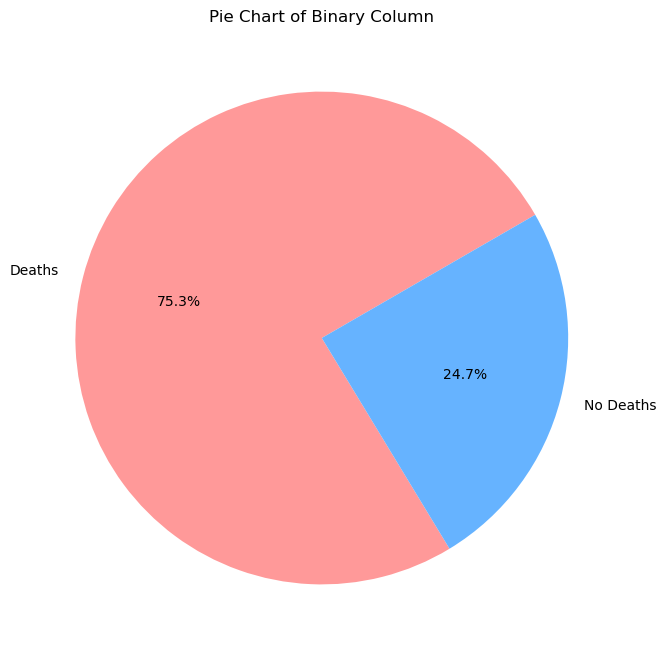

************** Distribution on other variables ************


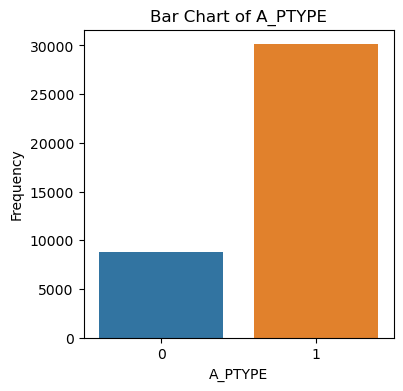

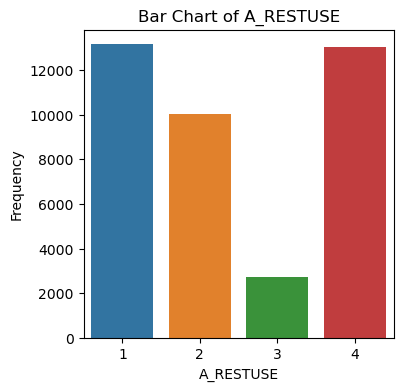

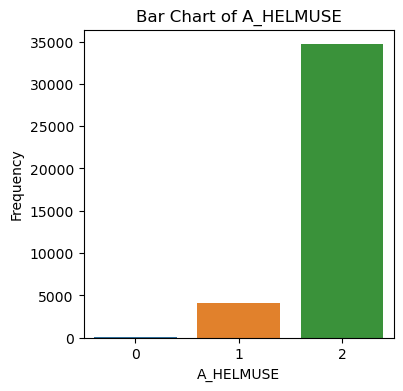

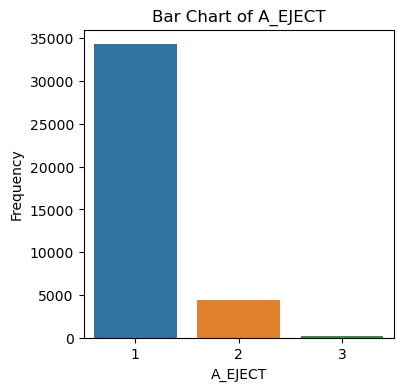

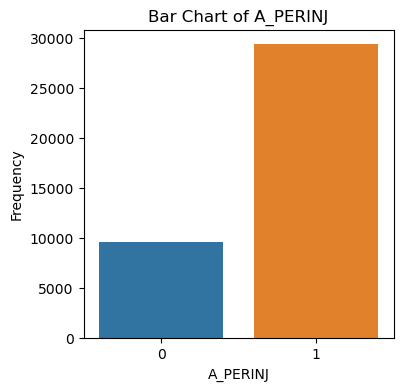

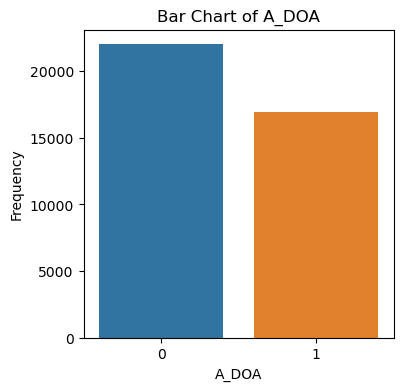

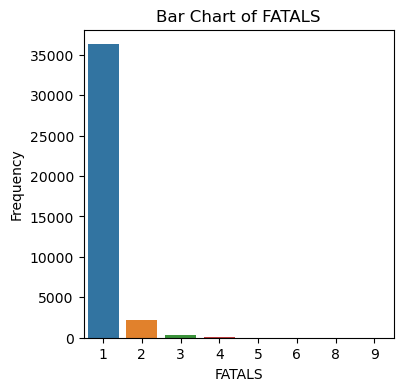

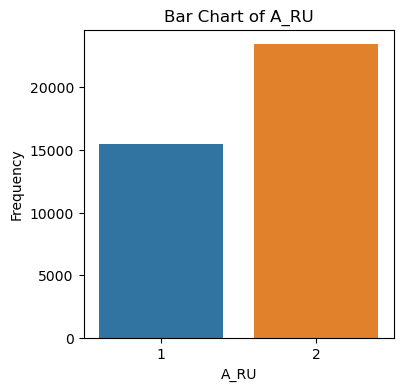

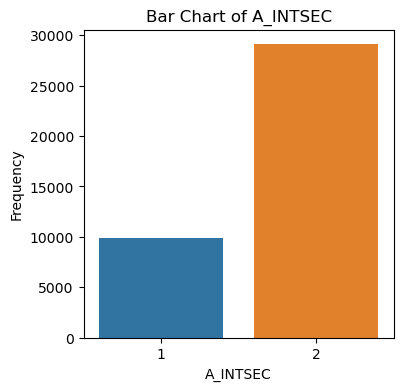

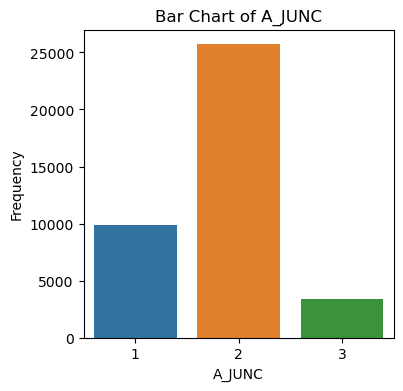

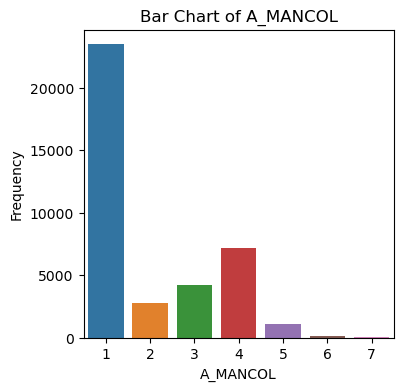

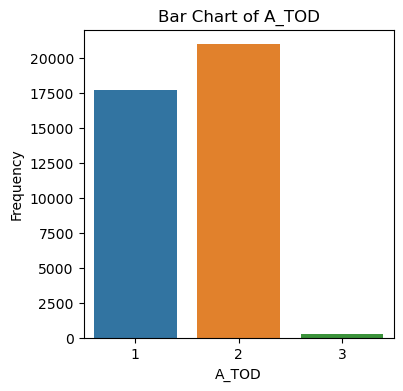

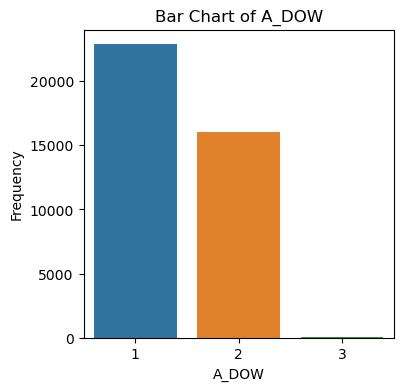

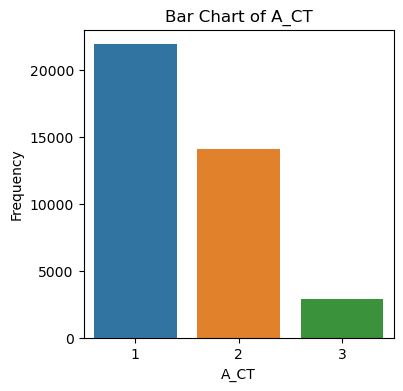

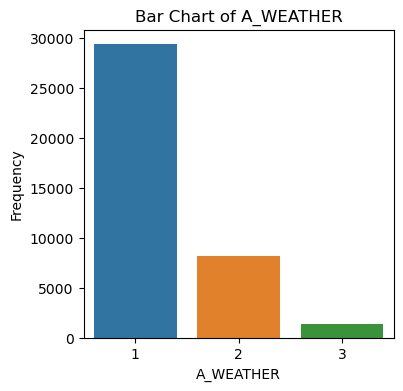

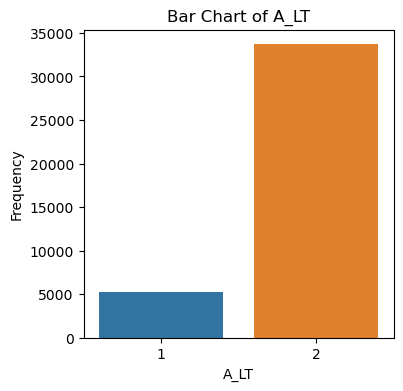

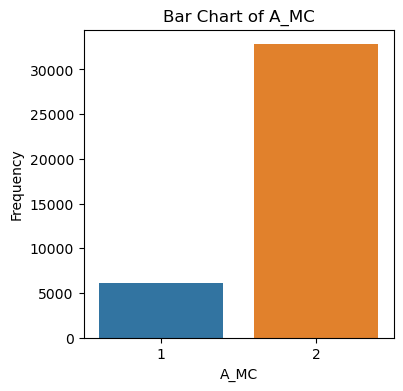

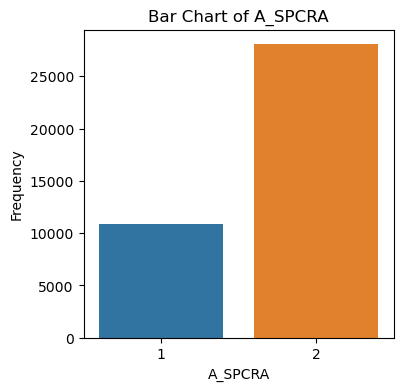

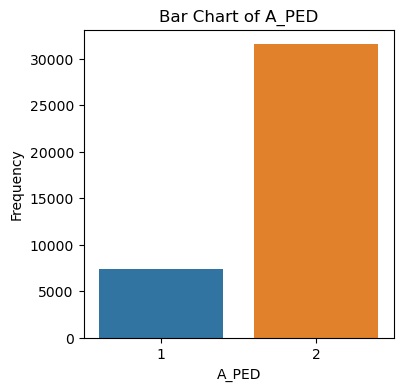

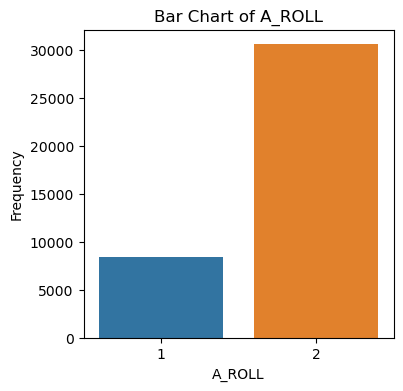

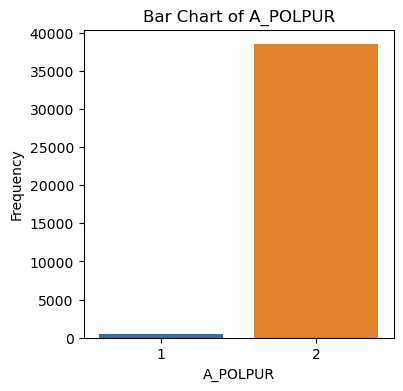

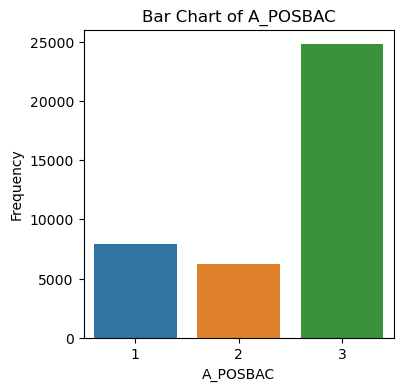

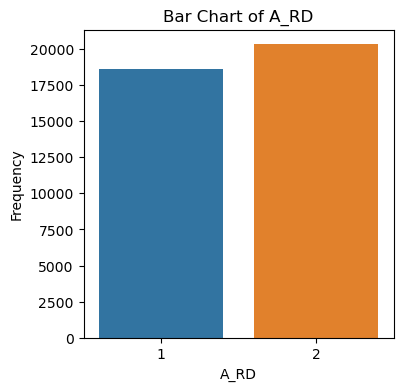

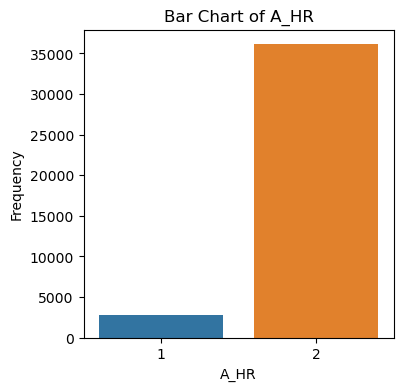

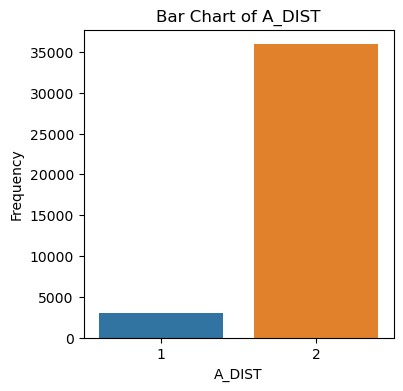

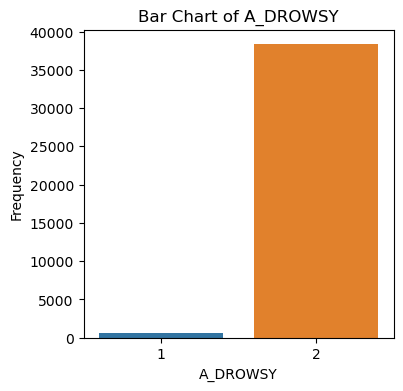

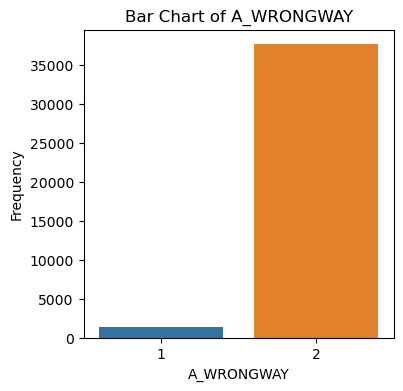

************** Crosstab Heatmap for dataset ************


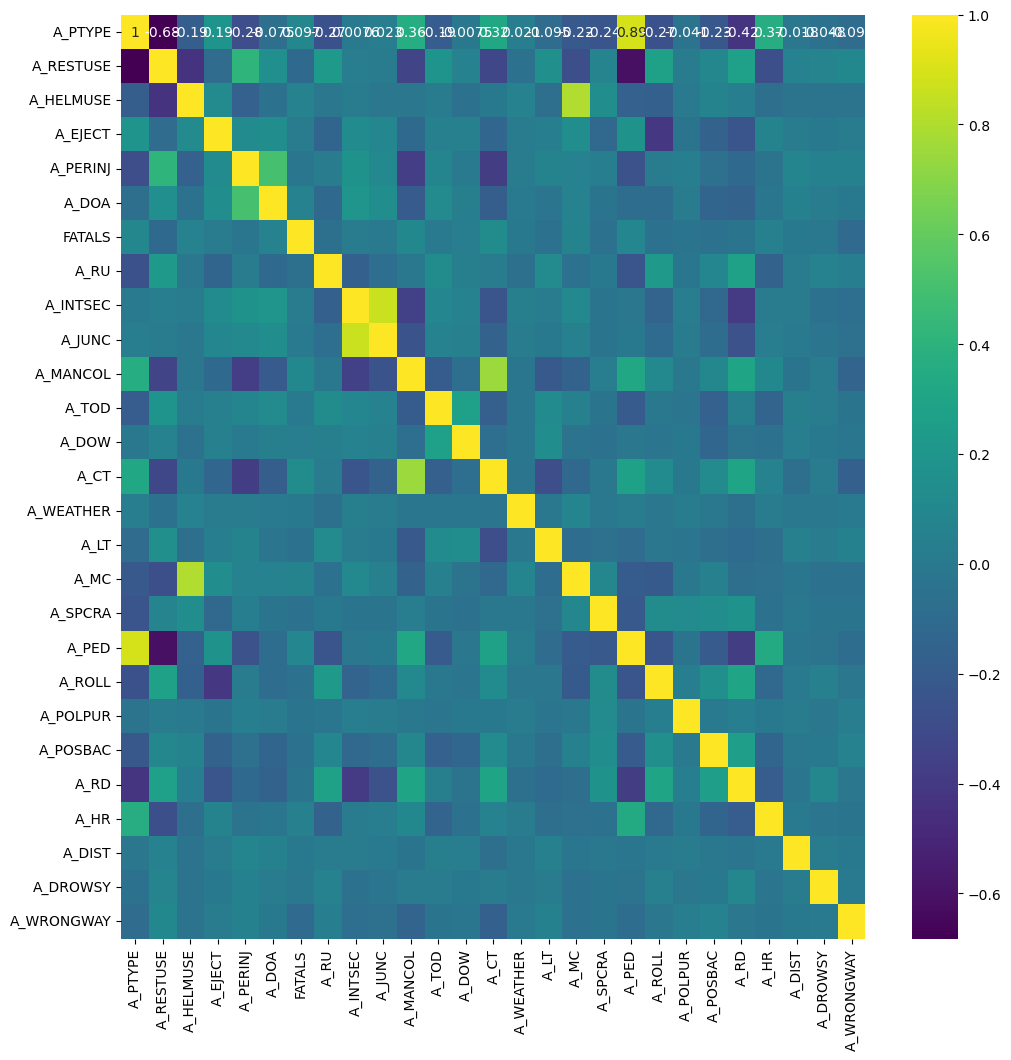


 ************** Training Model: LR **************

************** Model Evaluation **************

 Confusion Matrix: 

[[ 768  196]
 [ 252 2679]]

 Classification Report: 

              precision    recall  f1-score   support

           0     0.7529    0.7967    0.7742       964
           1     0.9318    0.9140    0.9228      2931

    accuracy                         0.8850      3895
   macro avg     0.8424    0.8554    0.8485      3895
weighted avg     0.8876    0.8850    0.8860      3895


 ************** Training Model: DT **************

************** Model Evaluation **************

 Confusion Matrix: 

[[ 941   23]
 [ 615 2316]]

 Classification Report: 

              precision    recall  f1-score   support

           0     0.6048    0.9761    0.7468       964
           1     0.9902    0.7902    0.8789      2931

    accuracy                         0.8362      3895
   macro avg     0.7975    0.8832    0.8129      3895
weighted avg     0.8948    0.8362    0.8462      38

In [4]:
if __name__== "__main__":
    results = main_function(input_filename, target, model_names, eval_on)
    print("\n************** Processing Completed **************\n")

#### Parameters details

In [5]:
# for model_name in model_names:
#     model = results[model_name]['model']
#     # Retrieve parameters
#     params = model.get_params()

#     # Print parameters
#     print("\n\n" + model_name + " Parameters:")
#     for param, value in params.items():
#         print(f"{param}: {value}")

#### Final Conclusion

Various models, which includes Decision Tree, Logisitic regression, Random Forest and Gradient Boosting, are being trained for the dataset after proper preprocessing. We only intent to focus on the target variable as "Person Injury" (i.e. PER_INJ). The column is already populated with either deaths "1" or no deaths "0". The intention is to identify the best model possible according to the f1 score, precision and accuracy.

From the evaluation of the Models, we can conclude that the Gradient Boosting Model ('GB') is the best model to go ahead with the further analysis, followed by Logistic Regression Model ('LR').